# Nepal Covid-19 Prediction and Visualization

## Importing the necessary libraries and dataset

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly 
import plotly.express as px
import plotly.graph_objects as go
plt.rcParams['figure.figsize'] = 25,10
import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode, plot,iplot
import folium
import plotly.io as pio
pio.renderers.default = 'notebook'
import seaborn as sns



In [4]:
pyo.init_notebook_mode(connected = True)
cf.go_offline()

In [9]:
dataset = pd.read_excel("nepal_corona_data.xlsx")

# Preprocessing the dataset

In [11]:
dataset = dataset[["District", "Confirmed", "Deaths", "Recovered", "Readmitted"]]

In [12]:
dataset


,District,Confirmed,Deaths,Recovered,Readmitted
0,Kathmandu,4522,21,110,0
1,Parsa,2313,35,176,0
2,Rautahat,1856,5,750,0
3,Sarlahi,1834,4,628,0
4,Kailali,1695,5,530,0
...,...,...,...,...,...
72,Mugu,13,0,4,0
73,Dolpa,6,1,2,0
74,Humla,5,0,2,0
75,Manang,3,0,1,0


In [13]:
## Creating the Active Cases column
dataset["Active Cases"] = dataset["Confirmed"] - dataset["Deaths"] - dataset["Recovered"]
dataset

,District,Confirmed,Deaths,Recovered,Readmitted,Active Cases
0,Kathmandu,4522,21,110,0,4391
1,Parsa,2313,35,176,0,2102
2,Rautahat,1856,5,750,0,1101
3,Sarlahi,1834,4,628,0,1202
4,Kailali,1695,5,530,0,1160
...,...,...,...,...,...,...
72,Mugu,13,0,4,0,9
73,Dolpa,6,1,2,0,3
74,Humla,5,0,2,0,3
75,Manang,3,0,1,0,2


In [14]:
### Creating the column named Total Cases
dataset["Total Cases"] = dataset["Recovered"] + dataset["Deaths"] + dataset["Active Cases"]

In [15]:
### Creating the columns Deaths, Recovered, Active Cases
dataset["Death"] = dataset["Deaths"]
dataset["Recovereds"] = dataset["Recovered"]
dataset["Active cases"] = dataset["Active Cases"]
dataset

,District,Confirmed,Deaths,Recovered,Readmitted,Active Cases,Total Cases,Death,Recovereds,Active cases
0,Kathmandu,4522,21,110,0,4391,4522,21,110,4391
1,Parsa,2313,35,176,0,2102,2313,35,176,2102
2,Rautahat,1856,5,750,0,1101,1856,5,750,1101
3,Sarlahi,1834,4,628,0,1202,1834,4,628,1202
4,Kailali,1695,5,530,0,1160,1695,5,530,1160
...,...,...,...,...,...,...,...,...,...,...
72,Mugu,13,0,4,0,9,13,0,4,9
73,Dolpa,6,1,2,0,3,6,1,2,3
74,Humla,5,0,2,0,3,5,0,2,3
75,Manang,3,0,1,0,2,3,0,1,2


In [16]:
## Removing the following columns i.e Deaths, Recovered, Active Cases, Confirmed
dataset.drop(["Deaths","Recovered","Active Cases", "Confirmed"], axis = 1, inplace = True)

In [17]:
## Renaming the columns
dataset.rename(columns = {"Active cases":"Active Cases","Recovereds":"Recovered"}, inplace = True)
dataset

,District,Readmitted,Total Cases,Death,Recovered,Active Cases
0,Kathmandu,0,4522,21,110,4391
1,Parsa,0,2313,35,176,2102
2,Rautahat,0,1856,5,750,1101
3,Sarlahi,0,1834,4,628,1202
4,Kailali,0,1695,5,530,1160
...,...,...,...,...,...,...
72,Mugu,0,13,0,4,9
73,Dolpa,0,6,1,2,3
74,Humla,0,5,0,2,3
75,Manang,0,3,0,1,2


In [18]:
### Creating the columns Recovered, Death, Readmitted
dataset["Recovereds"] = dataset["Recovered"]
dataset["Deaths"] = dataset["Death"]
dataset["Readmitteds"] = dataset["Readmitted"]

In [19]:
dataset

,District,Readmitted,Total Cases,Death,Recovered,Active Cases,Recovereds,Deaths,Readmitteds
0,Kathmandu,0,4522,21,110,4391,110,21,0
1,Parsa,0,2313,35,176,2102,176,35,0
2,Rautahat,0,1856,5,750,1101,750,5,0
3,Sarlahi,0,1834,4,628,1202,628,4,0
4,Kailali,0,1695,5,530,1160,530,5,0
...,...,...,...,...,...,...,...,...,...
72,Mugu,0,13,0,4,9,4,0,0
73,Dolpa,0,6,1,2,3,2,1,0
74,Humla,0,5,0,2,3,2,0,0
75,Manang,0,3,0,1,2,1,0,0


In [20]:
### Removing the columns
dataset.drop(["Readmitted", "Death", "Recovered"], axis = 1, inplace = True)

In [21]:
dataset

,District,Total Cases,Active Cases,Recovereds,Deaths,Readmitteds
0,Kathmandu,4522,4391,110,21,0
1,Parsa,2313,2102,176,35,0
2,Rautahat,1856,1101,750,5,0
3,Sarlahi,1834,1202,628,4,0
4,Kailali,1695,1160,530,5,0
...,...,...,...,...,...,...
72,Mugu,13,9,4,0,0
73,Dolpa,6,3,2,1,0
74,Humla,5,3,2,0,0
75,Manang,3,2,1,0,0


In [22]:
### Checking whether the data are null or not
dataset.isnull().sum()

District        0
Total Cases     0
Active Cases    0
Recovereds      0
Deaths          0
Readmitteds     0
dtype: int64

In [23]:
#### Removing the null data if they exists
dataset.dropna(inplace = True)


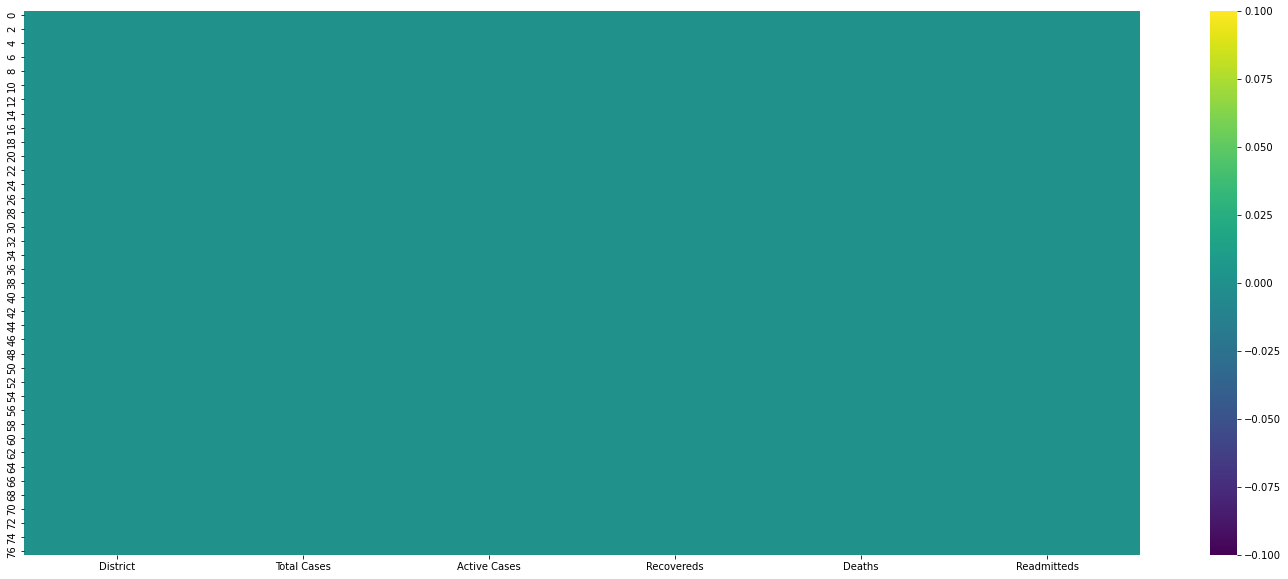

In [24]:
### Visualizing the null data if they exists
sns.heatmap(dataset.isnull(), cmap = "viridis" )

In [25]:
dataset

,District,Total Cases,Active Cases,Recovereds,Deaths,Readmitteds
0,Kathmandu,4522,4391,110,21,0
1,Parsa,2313,2102,176,35,0
2,Rautahat,1856,1101,750,5,0
3,Sarlahi,1834,1202,628,4,0
4,Kailali,1695,1160,530,5,0
...,...,...,...,...,...,...
72,Mugu,13,9,4,0,0
73,Dolpa,6,3,2,1,0
74,Humla,5,3,2,0,0
75,Manang,3,2,1,0,0


In [26]:
total_cases_no = dataset["Total Cases"].sum()
death = dataset["Deaths"].sum()
active = dataset["Active Cases"].sum()
recover = dataset["Recovereds"].sum()
readmit = dataset["Readmitteds"].sum()
print("Total number of Total Cases:", total_cases_no)
print("Total number of death:", death)
print("Total number of active Cases:",active)
print("Total number of recovered Cases:",recover)
print("Total number of readmitted Cases", readmit)

Total number of Total Cases: 39460
Total number of death: 228
Total number of active Cases: 17822
Total number of recovered Cases: 21410
Total number of readmitted Cases 0


# Visualizing the dataset

## Pie Chart Visualization

#### Matplotlib Visualization

In [27]:


name = ('Total Cases', 'Active Cases', 'Recovereds','Deaths')
value = (30483,15743,14603,137)

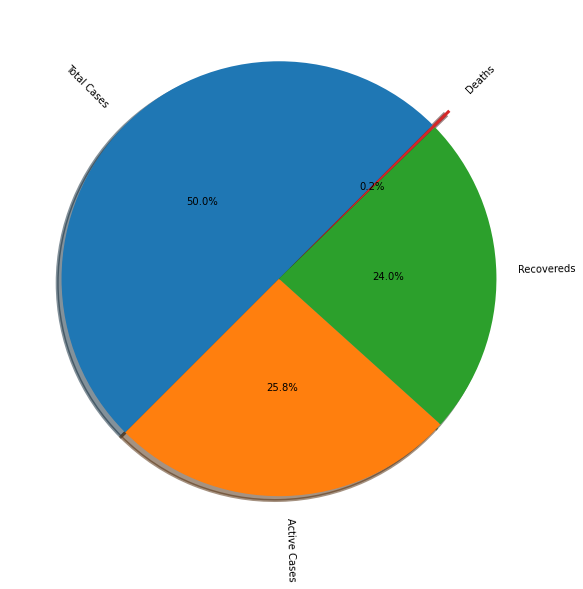

In [28]:
plt.pie(value, labels = name, autopct = '%0.1f%%', shadow = True, explode = (0,0,0,0.1), startangle = 45, pctdistance = 0.5, rotatelabels = True, wedgeprops= {'linewidth': 3})
plt.show()

##### Plotly Express Visualization

In [29]:
# Pie Chart visualization on the basis of Total Cases and Active Cases
fig = px.pie(dataset, title = " Pie Chart visualization on the basis of Total Cases and Active Cases ", values = "Active Cases", names = "District", hover_data = ["Total Cases"], height = 700)
fig.update_traces(textposition = 'inside', textinfo = "label+percent")
fig.show()

In [30]:
### Piechart Visualization on the basis of Recovered Cases
fig = px.pie(dataset, title = "Pie chart Visualization on the basis of Recovered Cases ", values = "Recovereds", names = "District", height = 700,  color_discrete_sequence = px.colors.sequential.RdBu)
fig.update_traces(textposition = "inside", textinfo = "label + percent")
fig.show()

##### Bar graph Visualization

In [31]:
fig = go.Figure()
fig.add_traces(go.Bar(x = dataset["District"], y = dataset["Total Cases"]))
fig.update_layout(title = "Nepal Covid-19 Visualization", xaxis = dict(title = "District"), yaxis = dict(title = "Total Cases") )



In [32]:
# Plotly Visualization
### Bar Graph visualization on the basis of Recovered Cases
dataset.iplot(kind = "bar", title = "Nepal Covid-19 Visualization", xTitle = "District", yTitle = "Recovered Cases", x = "District", y = "Recovereds")

In [33]:
#### Bar graph visualization on the basis of Active Cases
px.bar(dataset, x = "District", y = "Active Cases", color = "District")

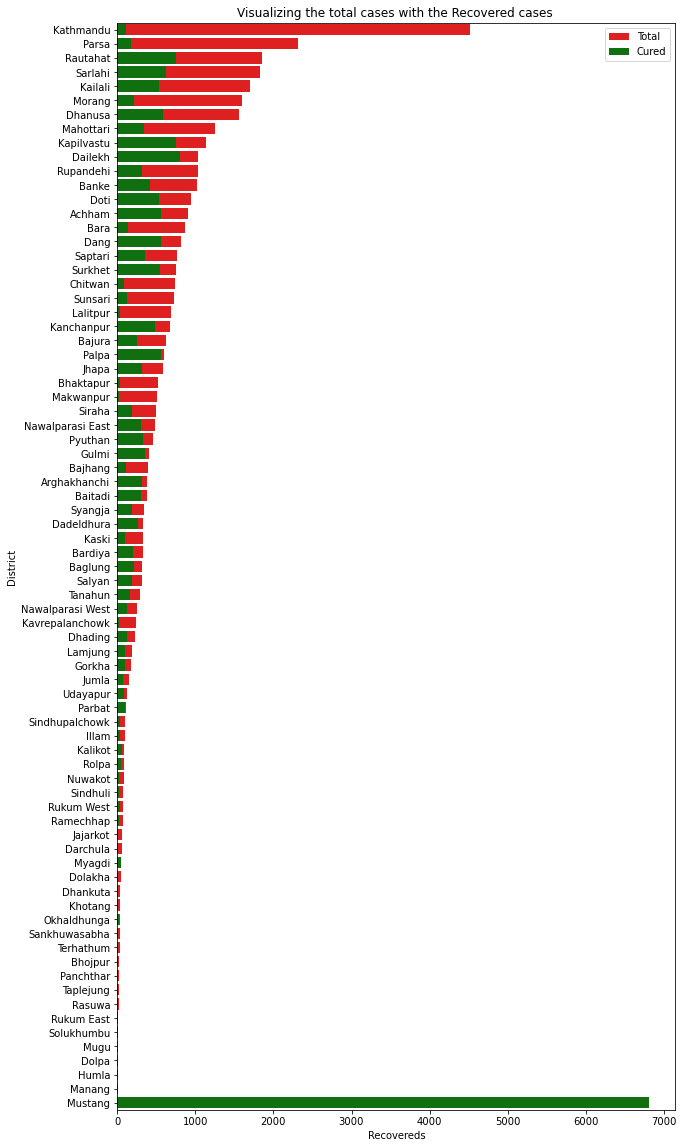

In [34]:
# Visualizing the Total Cases with the Recovered 
f, ax = plt.subplots(figsize = (10, 20))
sns.barplot(x = "Total Cases", y = "District", data = dataset, label = "Total", color = "red")
sns.barplot(x = "Recovereds", y = "District", data = dataset, label = "Cured", color = "green")
ax.legend( loc = "upper right", frameon = True)
ax.set_title("Visualizing the total cases with the Recovered cases ")
plt.show()


In [35]:
dataset

,District,Total Cases,Active Cases,Recovereds,Deaths,Readmitteds
0,Kathmandu,4522,4391,110,21,0
1,Parsa,2313,2102,176,35,0
2,Rautahat,1856,1101,750,5,0
3,Sarlahi,1834,1202,628,4,0
4,Kailali,1695,1160,530,5,0
...,...,...,...,...,...,...
72,Mugu,13,9,4,0,0
73,Dolpa,6,3,2,1,0
74,Humla,5,3,2,0,0
75,Manang,3,2,1,0,0


# Time Series data Visualization

## Data Preprocessing

In [2]:
# Importing the dataset
time_series = pd.read_csv("Nepal_time_series.csv")
## Renaming column
time_series.rename(columns = {"Confirmed": "Total Cases"}, inplace = True)

<IPython.core.display.Javascript object>

In [3]:
### Creating the column active cases
time_series["Active Cases"] = time_series["Total Cases"] - time_series["Recovered"] - time_series["Deaths"]
time_series

,Date,Total Cases,Recovered,Deaths,Active Cases
0,1/22/2020,0,0,0,0
1,1/23/2020,0,0,0,0
2,1/24/2020,0,0,0,0
3,1/25/2020,1,0,0,1
4,1/26/2020,1,0,0,1
...,...,...,...,...,...
205,8/14/2020,25551,17077,99,8375
206,8/15/2020,26019,17201,102,8716
207,8/16/2020,26660,17335,104,9221
208,8/17/2020,27241,17495,107,9639


In [4]:
# Creating the columns
time_series["Total Case"] = time_series["Total Cases"]
time_series["Active Case"] =time_series["Active Cases"]
time_series["Recovered Cases"] = time_series["Recovered"]
time_series["Death"] = time_series["Deaths"]

In [5]:
time_series

,Date,Total Cases,Recovered,Deaths,Active Cases,Total Case,Active Case,Recovered Cases,Death
0,1/22/2020,0,0,0,0,0,0,0,0
1,1/23/2020,0,0,0,0,0,0,0,0
2,1/24/2020,0,0,0,0,0,0,0,0
3,1/25/2020,1,0,0,1,1,1,0,0
4,1/26/2020,1,0,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...
205,8/14/2020,25551,17077,99,8375,25551,8375,17077,99
206,8/15/2020,26019,17201,102,8716,26019,8716,17201,102
207,8/16/2020,26660,17335,104,9221,26660,9221,17335,104
208,8/17/2020,27241,17495,107,9639,27241,9639,17495,107


In [6]:
# Removing the columns
time_series.drop(["Total Case","Recovered", "Deaths", "Active Case"], axis = 1, inplace = True)


In [7]:
# Renaming the column
time_series.rename(columns= {"Death":"Deaths"}, inplace =True)


In [8]:

time_series

,Date,Total Cases,Active Cases,Recovered Cases,Deaths
0,1/22/2020,0,0,0,0
1,1/23/2020,0,0,0,0
2,1/24/2020,0,0,0,0
3,1/25/2020,1,1,0,0
4,1/26/2020,1,1,0,0
...,...,...,...,...,...
205,8/14/2020,25551,8375,17077,99
206,8/15/2020,26019,8716,17201,102
207,8/16/2020,26660,9221,17335,104
208,8/17/2020,27241,9639,17495,107


In [9]:
dataset

NameError: name 'dataset' is not defined

# Race Bar Chart Visualization

In [12]:
# Race Bar Chart Visualization
import os
### Importing the datas
datas = time_series



In [13]:
time_series.to_csv('time_series.csv')

In [14]:
### Selecting the columns to display
cols = ["Date","Total Cases", "Active Cases", "Recovered Cases", "Deaths"]
subsetdata = datas[cols]

In [15]:

### Select column as index
subsetdata.set_index('Date', inplace = True)


In [16]:
# ### Cumulative sum of the all column
# cum_sum_data = subsetdata.cumsum(axis = 0)
# cum_sum_data.tail(10)
subsetdata

,Total Cases,Active Cases,Recovered Cases,Deaths
Date,,,,
1/22/2020,0,0,0,0
1/23/2020,0,0,0,0
1/24/2020,0,0,0,0
1/25/2020,1,1,0,0
1/26/2020,1,1,0,0
...,...,...,...,...
8/14/2020,25551,8375,17077,99
8/15/2020,26019,8716,17201,102
8/16/2020,26660,9221,17335,104


In [18]:
subsetdata.to_csv('race_bar.csv')

In [41]:
### Importing and Applying the bar_chart_race library
import bar_chart_race as bcr
bcr.bar_chart_race(df = subsetdata, filename = None, figsize = (5,5), title = "Race bar chart of covid-19 Visualization of Nepal")

## Visualization on the basis of Time Series

In [101]:
#Plotly Express Visualization of Total Cases
figs = px.bar(time_series, x = "Date", y = "Total Cases", color = "Total Cases", title = "Nepal Time Series Covid-19 Visualization")
figs.show()

# Subplot Graph Visualization

In [102]:
time_series

,Date,Total Cases,Active Cases,Recovered Cases,Deaths
0,1/22/2020,0,0,0,0
1,1/23/2020,0,0,0,0
2,1/24/2020,0,0,0,0
3,1/25/2020,1,1,0,0
4,1/26/2020,1,1,0,0
...,...,...,...,...,...
205,8/14/2020,25551,8375,17077,99
206,8/15/2020,26019,8716,17201,102
207,8/16/2020,26660,9221,17335,104
208,8/17/2020,27241,9639,17495,107


In [103]:
# Bargraph Subplots of all the columns of data for better analysis
from plotly.subplots import make_subplots
figs = make_subplots(
    rows =2, cols= 2,
    specs = [[{"secondary_y":True}, {"secondary_y":True}], [{"secondary_y":True}, {"secondary_y":True}]],
    subplot_titles= ("Total Cases", "Active Cases", "Recovered Cases", "Deaths Cases"))
    
figs.add_trace(go.Bar(x = time_series["Date"], y = time_series["Total Cases"], name = "Total Cases",
                     marker = dict(color = time_series["Total Cases"], coloraxis = "coloraxis")),1,1)
figs.add_trace(go.Bar(x = time_series["Date"], y = time_series["Active Cases"], name = "Active Cases",
                     marker = dict(color = time_series["Active Cases"], coloraxis = "coloraxis")),1,2)
figs.add_trace(go.Bar(x = time_series['Date'], y = time_series["Recovered Cases"], name = "Recovered Cases",
                     marker = dict(color = time_series["Recovered Cases"],coloraxis = "coloraxis")),2,1)
figs.add_trace(go.Bar(x = time_series['Date'], y = time_series["Deaths"], name = "Deaths",
                     marker = dict(color = time_series["Deaths"], coloraxis = "coloraxis")),2,2)
figs.update_layout(coloraxis = dict(colorscale = "Bluered_r"), showlegend = False, title_text = "Covid_19 Time Series Visualization of Nepal")
figs.update_layout(plot_bgcolor = 'rgb(230,230,230)')



# Scatter plot visualization

In [104]:
time_series


,Date,Total Cases,Active Cases,Recovered Cases,Deaths
0,1/22/2020,0,0,0,0
1,1/23/2020,0,0,0,0
2,1/24/2020,0,0,0,0
3,1/25/2020,1,1,0,0
4,1/26/2020,1,1,0,0
...,...,...,...,...,...
205,8/14/2020,25551,8375,17077,99
206,8/15/2020,26019,8716,17201,102
207,8/16/2020,26660,9221,17335,104
208,8/17/2020,27241,9639,17495,107


In [107]:
#Scatter plot visualization between all the columns of the dataset for better analysis
fig = go.Figure()
fig.add_trace(go.Scatter(x = time_series["Date"], y = time_series["Total Cases"], mode = "lines", name = "Total Cases", line = dict(color = "blue", width =3)))
fig.add_trace(go.Scatter(x = time_series["Date"], y = time_series["Active Cases"], mode = "lines", name = "Active Cases", line = dict(color = "green", width = 2.5)))
fig.add_trace(go.Scatter(x = time_series["Date"], y = time_series["Recovered Cases"], mode = "lines", name = "Recovered Cases", line = dict(color = "maroon", width = 2.5)))
fig.add_trace(go.Scatter(x = time_series["Date"], y = time_series["Deaths"], mode = "lines", name = "Deaths", line = dict(color = "yellow", width = 2.5)))  
fig.update_layout(title = "Nepal Covid-19 Visualization")


In [106]:
### Scatter Subplots of all the columns of data
from plotly.subplots import make_subplots
fig = make_subplots(rows= 2, cols = 2,
                    specs = [[{},{}],
                            [{},{}]],
                    subplot_titles= ("Total Cases", "Active Cases", "Recovereds", "Deaths"))
fig.add_trace(go.Scatter(x = time_series["Date"], y = time_series["Total Cases"], name = "Total Cases", marker = dict(color = time_series["Total Cases"],
                                                                                       coloraxis = "coloraxis")),1,1)
fig.add_trace(go.Scatter(x= time_series["Date"], y = time_series["Active Cases"], name = "Active Cases", marker = dict(color = time_series["Active Cases"],
                                                                                    coloraxis = "coloraxis")),1,2)
fig.add_trace(go.Scatter(x = time_series["Date"], y = time_series["Recovered Cases"],name = "Recovered Cases", marker = dict(color = time_series["Recovered Cases"],
                                                                                              coloraxis = "coloraxis")),2,1)
fig.add_trace(go.Scatter(x = time_series["Date"], y = time_series["Deaths"], name = "Deaths", marker = dict(color = time_series["Deaths"], 
                                                                                          coloraxis = "coloraxis")),2,2)
                    
fig.update_layout(coloraxis = dict(colorscale = "Bluered_r"), showlegend = False, title_text = "Scatter plot Visualization")
fig.update_layout(plot_bgcolor = 'rgb(230,230,230)')
fig.show()

### For Map Visualization


In [108]:
# import matplotlib.pyplot as plt
# import pandas as pd
# import geopandas as gpd
# from geopandas import GeoDataFrame
# from shapely.geometry import Point
# import adjustText as aT
# nepal_district = gpd.read_file(r"C:\\Users\\lant\\Desktop\\machine\\jupyter notebook\\covid-19 analysis\\NepalMaps-master\\baselayers\\NPL_adm\\NPL_adm3.shp")
# nepal_district["center"] = nepal_district["geometry"].centroid
# nepal_district_points = nepal_district.copy()
# nepal_district_points.set_geometry("center", inplace = True)
# ax = nepal_district.plot(figsize = (15, 15), color = "whitesmoke", edgecolor = "lightgrey", linewidth = 0.5)
# texts = []

# for x, y, label in zip(nepal_district_points.geometry.x, nepal_district_points.geometry.y, nepal_district_points["NAME_3"]):
#     texts.append(plt.text(x, y, label, fontsize = 8))

# aT.adjust_text(texts, force_points=0.3, force_text=0.8, expand_points=(1,1), expand_text=(1,1), 
#                arrowprops=dict(arrowstyle="-", color='grey', lw=0.5))
# nepal_district = nepal_district[["NAME_3", "geometry"]]
# nepal_district.rename(columns = {'NAME_3':'District'}, inplace = True)
# nepal_district.plot(column = "District", figsize = (15,10))


In [36]:
### Reading the data
map_data = pd.read_csv("nepal_real_lat_long.csv")

In [37]:
### Check whether the data is null or not
map_data
map_data.isnull().sum()

District     0
Latitude     0
Longitude    0
dtype: int64

In [38]:
### Combining the map_data and dataset on the basis of common column District
fulldata = pd.merge(map_data, dataset, on = "District")

In [39]:
fulldata.to_csv('final.csv')

In [42]:
final = pd.read_csv('final.csv')
final.head()

,Unnamed: 0,District,Latitude,Longitude,Total Cases,Active Cases,Recovereds,Deaths,Readmitteds
0,0,Rautahat,27.032440,85.291217,1856,1101,750,5,0
1,1,Kailali,28.760919,80.826350,1695,1160,530,5,0
2,2,Dailekh,28.898268,81.671592,1037,231,805,1,0
3,3,Mahottari,26.857771,85.820595,1256,904,344,8,0
4,4,Kapilvastu,27.622169,82.978009,1138,387,747,4,0


In [133]:
### Visualizing the all the Total cases on the Nepal map with respect to the district
map = folium.Map(location = [28,85], zoom_start = 6.5, tiles = 'openstreetmap')
for lat, long, value, name in zip(fulldata['Latitude'], fulldata['Longitude'],fulldata['Total Cases'],fulldata['District']):
    folium.CircleMarker([lat,long],radius = value*0.02, popup = ('<strong>State</strong>:' + str(name).capitalize() + '<br>''<strong>Total Cases</strong>:' + str(value)),color = 'cyan', fill_color = 'red', fill_opacity = 0.7).add_to(map)

In [134]:
map
